[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
['marvellous' 'bay' 'chisel' ..., 'mr' 'perdita' 'raymond']
# 'EAP':
  . Most correlated unigrams:
. perdita
. raymond
  . Most correlated bigrams:
. chess player
. said dupin
['laws' 'naval' 'painfully' ..., 'street' 'gilman' 'old']
# 'HPL':
  . Most correlated unigrams:
. gilman
. old
  . Most correlated bigrams:
. new england
. shunned house
['sympathetic' 'decay' 'attract' ..., 'love' 'perdita' 'raymond']
# 'MWS':
  . Most correlated unigrams:
. perdita
. raymond
  . Most correlated bigrams:
. fellow creatures
. lord raymond


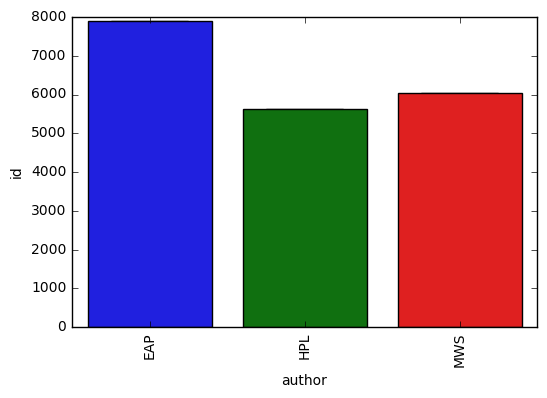

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
%matplotlib inline

#load the training and test datasets
train=pd.read_csv("data/train.csv")
test=pd.read_csv("data/test.csv")

#Lets see the count of each author
train.groupby('author').id.count().plot.bar()
cc=train.groupby('author').count()

sns.barplot(x=cc.index,y=cc.id)

#some feature engineering
train['authorid']=train['author'].factorize()[0]
train_id = train[['author', 'authorid']].drop_duplicates().sort_values('authorid')
author_to_id = dict(train_id.values)
id_to_category = dict(train_id[['authorid', 'author']].values)

#tfidf analyses
tfidf=TfidfVectorizer(sublinear_tf=True,min_df=5,ngram_range=(1,2),stop_words='english')
labels=train.authorid

features=tfidf.fit_transform(train['text']).toarray()

features.shape

print(features)

author_to_id

N=2
#
for author,authorid in sorted(author_to_id.items()):
    features_chi2 = chi2(features, labels == authorid)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    print(feature_names)
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}':".format(author))
    print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
    print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))
    

